## <center> <u> MOVIE GENRE CLASSIFICATION </u></center>

#### AUTHOR(s): Raghul V, Shreyans Jain
----------------

#### Description

- The objective of this notebook is to develop a ML algorithm for the classification of the multiple genres of a movie based on their plots.

- To do this classification, the kernal is divided into 4 parts which is;

    - Part 1: it describes the list libraries being used in this kernel.
   
    - Part 2: it is about data cleansing and identification of the genres to be used for the classification of the movies. The genres that are used to classify ~96% of movies will be used building the classification algorithms.

#### LIST OF LIBRARIES USED

- PANDAS
- NUMPY
- MATPLOTLIB
- SEABORN
- PICKLE
- nltk
- sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time

In [2]:
from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [6]:
movies = pd.read_csv('/Users/raghul/Downloads/wiki_movie_plot.csv', delimiter=',')
movies.dataframeName = 'wiki_movie_plots_deduped.csv'
nRow, nCol = movies.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 34886 rows and 8 columns


In [7]:
movies.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [8]:
# creation of the column count for aggregation
movies['Count']=1
movies[['Genre','Count']].groupby(['Genre'], as_index=False).count().shape[0]

2265

There are 2265 different genres movies.

- It is not possible to build an ML algorithm having a good accuracy to estimate the genre of movies for the following reasons:

    - The number of classes is very high
    - Many classes have very few observation.

In [9]:
# harmonization
movies['GenreCorrected'] =movies['Genre'] 
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' - ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' / ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('/', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' & ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(', ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('; ', '|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-pic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biopic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographical', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biodrama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bio-drama', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biographic', 'biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(film genre\)', '')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animated','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anime','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('children\'s','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedey','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[not in citation given\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' set 4,000 years ago in the canadian arctic','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historical','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romantic','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3-d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('3d','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('viacom 18 motion pictures','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci-fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ttriller','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('.','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('based on radio serial','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' on the early years of hitler','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sci fi','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science fiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (30min)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('16 mm film','short')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[140\]','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[144\]','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' for ','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventures','adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('kung-fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial arts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war ii','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('world war i','war')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography about montreal canadiens star|maurice richard','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bholenath movies|cinekorn entertainment','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(volleyball\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy film','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('anthology film','anthology')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography fim','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('avant-garde','avant_garde')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biker film','biker')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy cop','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('buddy film','buddy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy 2-reeler','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('films','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('film','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biography of pioneering american photographer eadweard muybridge','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('british-german co-production','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('bruceploitation','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedy-drama adaptation of the mordecai richler novel','comedy-drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies by the mob\|knkspl','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movies','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('movie','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming of age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('coming-of-age','coming_of_age')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama about child soldiers','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( based).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( co-produced).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( about).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musical b','musical')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationchildren','animation|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' period','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('drama loosely','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(aquatics|swimming\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("yogesh dattatraya gosavi's directorial debut \[9\]",'')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("war-time","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wartime","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("ww1","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('unknown','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace("wwii","war")
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psychological','psycho')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom-coms','romance')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('true crime','crime')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|007','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('slice of life','slice_of_life')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computer animation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gun fu','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('j-horror','horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(shogi|chess\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('afghan war drama','war drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|6 separate stories','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(30min\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' (road bicycle racing)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' v-cinema','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|docudrama','\|documentary|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' in animation','|animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptation).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adaptated).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((adapted).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('(( on ).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('american football','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dev\|nusrat jahan','sports')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('television miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(artistic\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \|direct-to-dvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('history dram','history drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial art','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('psycho thriller,','psycho thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|1 girl\|3 suitors','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(road bicycle racing\)','')
filterE = movies['GenreCorrected']=="ero"
movies.loc[filterE,'GenreCorrected']="adult"
filterE = movies['GenreCorrected']=="music"
movies.loc[filterE,'GenreCorrected']="musical"
filterE = movies['GenreCorrected']=="-"
movies.loc[filterE,'GenreCorrected']=''
filterE = movies['GenreCorrected']=="comedy–drama"
movies.loc[filterE,'GenreCorrected'] = "comedy|drama"
filterE = movies['GenreCorrected']=="comedy–horror"
movies.loc[filterE,'GenreCorrected'] = "comedy|horror"
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' ','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace(',','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('-','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionadventure','action|adventure')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actioncomedy','action|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actiondrama','action|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionlove','action|love')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionmasala','action|masala')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionchildren','action|children')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasychildren\|','fantasy|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasycomedy','fantasy|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantasyperiod','fantasy|period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('cbctv_miniseries','tv_miniseries')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramacomedysocial','drama|comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedydrama','comedy|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramathriller','drama|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedyhorror','comedy|horror')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sciencefiction','science_fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventurecomedy','adventure|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('animationdrama','animation|drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('muslim','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('thriler','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('crimethriller','crime|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('fantay','fantasy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionthriller','action|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedysocial','comedy|social')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martialarts','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(children\|poker\|karuta\)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('epichistory','epic|history')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotica','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('erotic','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('((\|produced\|).+)','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('chanbara','chambara')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('comedythriller','comedy|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biblical','religious')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('colour\|yellow\|productions\|eros\|international','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|directtodvd','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('liveaction','live|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('melodrama','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroes','superheroe')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('gangsterthriller','gangster|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heistcomedy','comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('heist','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historic','history')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('historydisaster','history|disaster')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('warcomedy','war|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('westerncomedy','western|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('ancientcostume','costume')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('computeranimation','animation')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramatic','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familya','family')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramedy','drama|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('dramaa','drama')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('famil\|','family')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superheroe','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('biogtaphy','biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('devotionalbiography','devotional|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('docufiction','documentary|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('familydrama','family|drama')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('espionage','spy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('supeheroes','superhero')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancefiction','romance|fiction')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horrorthriller','horror|thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspensethriller','suspense|thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('musicaliography','musical|biography')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('triller','thriller')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|\(fiction\)','|fiction')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanceaction','romance|action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancecomedy','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romancehorror','romance|horror')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romcom','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('rom\|com','romance|comedy')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('satirical','satire')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fictionchildren','science_fiction|children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('homosexual','adult')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('sexual','adult')

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('mockumentary','documentary')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('periodic','period')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('romanctic','romantic')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('politics','political')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('samurai','martial_arts')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('tv_miniseries','series')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('serial','series')

filterE = movies['GenreCorrected']=="musical–comedy"
movies.loc[filterE,'GenreCorrected'] = "musical|comedy"

filterE = movies['GenreCorrected']=="roman|porno"
movies.loc[filterE,'GenreCorrected'] = "adult"


filterE = movies['GenreCorrected']=="action—masala"
movies.loc[filterE,'GenreCorrected'] = "action|masala"


filterE = movies['GenreCorrected']=="horror–thriller"
movies.loc[filterE,'GenreCorrected'] = "horror|thriller"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('family','children')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('martial_arts','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('horror','thriller')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('war','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('adventure','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('science_fiction','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('western','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('noir','black')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('spy','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('superhero','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('social','')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('suspense','action')


filterE = movies['GenreCorrected']=="drama|romance|adult|children"
movies.loc[filterE,'GenreCorrected'] = "drama|romance|adult"

movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\|–\|','|')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip(to_strip='\|')
movies['GenreCorrected']=movies['GenreCorrected'].str.replace('actionner','action')
movies['GenreCorrected']=movies['GenreCorrected'].str.strip()

/var/folders/k4/ffhngpcx4z5545d3qcwq0_z40000gn/T/ipykernel_6981/2761400162.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['GenreCorrected']=movies['GenreCorrected'].str.replace(' \(film genre\)', '')
/var/folders/k4/ffhngpcx4z5545d3qcwq0_z40000gn/T/ipykernel_6981/2761400162.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['GenreCorrected']=movies['GenreCorrected'].str.replace('\[not in citation given\]','')
/var/folders/k4/ffhngpcx4z5545d3qcwq0_z40000gn/T/ipykernel_6981/2761400162.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movies['GenreCorrected']=movies['GenreCorrected'].str.replace('.','')
/var/folders/k4/ffhngpcx4z5545d3qcwq0_z40000gn/T/ipykernel_6981/2761400162.py:35: FutureWarning: The default v

In [10]:
moviesGenre = movies[['GenreCorrected','Count']].groupby(['GenreCorrected']).count()
moviesGenre.to_csv('GenreCorrected.csv',sep=',')

In [11]:
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'], as_index=False).count().shape[0]

1199

After harmonization, the number of movies genres decreased 1198 from 2265

#### Overview of the genre after cleansing

In [12]:
movies[['GenreCorrected','Count']].groupby(['GenreCorrected'],as_index=False).count().sort_values(['Count'], ascending=False).head(10)

,GenreCorrected,Count
0,,6206
516,drama,6107
359,comedy,4411
2,action,3790
1111,thriller,2163
964,romance,954
203,animation,601
973,romance|comedy,577
447,crime,573
387,comedy|drama,560


In [13]:
movies['GenreSplit']=movies['GenreCorrected'].str.split('|')
movies['GenreSplit']= movies['GenreSplit'].apply(np.sort).apply(np.unique)

In [14]:
movies['GenreSplit'][11]

array(['action', 'crime', 'short'], dtype='<U6')

#### Movies for each genre 

In [15]:
genres_array = np.array([])

for i in range(0,movies.shape[0]-1):
    genres_array = np.concatenate((genres_array, movies['GenreSplit'][i] ))
    
genres_array

array(['', '', '', ..., 'comedy', 'comedy', 'romance'], dtype='<U32')

In [16]:
genres = pd.DataFrame({'Genre':genres_array})

In [17]:
genres = pd.DataFrame({'Genre':genres_array})

In [18]:
# Histogram for genre
genres['Count']=1
df = genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False).head(10)

#### Identifying the genre to be selected

In [19]:
genres=genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)

In [20]:
genres = genres[genres['Genre']!='']
genres.head(25)

,Genre,Count
116,drama,9487
85,comedy,7320
4,action,5952
426,thriller,3291
337,romance,2639
94,crime,1607
244,musical,951
16,animation,914
73,children,684
131,fantasy,542


In [21]:
TotalCountGenres=sum(genres['Count'])


In [22]:
TotalCountGenres

37321

In [23]:
genres['Frequency'] = genres['Count']/TotalCountGenres
genres['CumulativeFrequency'] = genres['Frequency'].cumsum()
genres.head(20)

,Genre,Count,Frequency,CumulativeFrequency
116,drama,9487,0.254200,0.254200
85,comedy,7320,0.196136,0.450336
4,action,5952,0.159481,0.609818
426,thriller,3291,0.088181,0.697998
337,romance,2639,0.070711,0.768709
94,crime,1607,0.043059,0.811768
244,musical,951,0.025482,0.837250
16,animation,914,0.024490,0.861740
73,children,684,0.018327,0.880068
131,fantasy,542,0.014523,0.894590


#### Selecting the genres having a cumulative frequency 95.7% (~96%) and below

In [24]:
np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])

array(['drama', 'comedy', 'action', 'thriller', 'romance', 'crime',
       'musical', 'animation', 'children', 'fantasy', 'mystery',
       'biography', 'black', 'history', 'short', 'documentary', 'sports',
       'series', 'adult', 'political'], dtype=object)

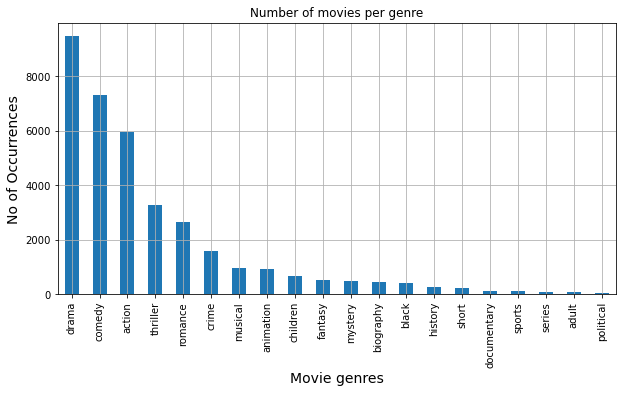

In [25]:
genres[genres['CumulativeFrequency']<=.957][['Genre','Count']].plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(10, 5))
plt.title("Number of movies per genre")
plt.ylabel('No of Occurrences', fontsize=14)
plt.xlabel('Movie genres', fontsize=14)
plt.show()

In [26]:
mainGenres=np.array(genres[genres['CumulativeFrequency']<=.957]['Genre'])
arr1=np.array(['adult', 'romance', 'drama','and'])

# Genres that are not in the "MainGenres" array will be deleted
arr1[np.in1d(arr1,mainGenres)] 

array(['adult', 'romance', 'drama'], dtype='<U7')

In [27]:
movies['GenreSplit'][10:12].apply(lambda x: x[np.in1d(x,mainGenres)])

10                   [short]
11    [action, crime, short]
Name: GenreSplit, dtype: object

In [28]:
movies['GenreSplitMain'] = movies['GenreSplit'].apply(lambda x: x[np.in1d(x,mainGenres)])

In [29]:
movies[['GenreSplitMain','GenreSplit','Genre']][200:220]

,GenreSplitMain,GenreSplit,Genre
200,[drama],[drama],drama
201,[drama],[drama],drama
202,[comedy],[comedy],comedy
203,[drama],[drama],drama
204,[comedy],[comedy],comedy
205,"[comedy, drama]","[comedy, drama]",comedy drama
206,[mystery],[mystery],mystery
207,[drama],[drama],drama
208,[drama],[drama],drama
209,"[comedy, drama]","[comedy, drama]",comedy drama


In [30]:
# Functions for cleaning the plots of the movies
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    #text = re.sub('\W', ' ', text)
    #text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [31]:
list(movies['Plot'][10:12].apply(clean_text))

['the rarebit fiend gorges on welsh rarebit at a restaurant. when he leaves, he begins to get dizzy as he starts to hallucinate. he desperately tries to hang onto a lamppost as the world spins all around him. a man helps him get home. he falls into bed and begins having more hallucinatory dreams. during a dream sequence, the furniture begins moving around the room. imps emerge from a floating welsh rarebit container and begin poking his head as he sleeps. his bed then begins dancing and spinning wildly around the room before flying out the window with the fiend in it. the bed floats across the city as the fiend floats up and off the bed. he hangs off the back and eventually gets caught on a weathervane atop a steeple. his bedclothes tear and he falls from the sky, crashing through his bedroom ceiling. the fiend awakens from the dream after falling out of his bed.',
 'the film features a train traveling through the rockies and a hold up created by two thugs placing logs on the line. the

In [32]:
list(movies['Plot'][10:12])

['The Rarebit Fiend gorges on Welsh rarebit at a restaurant. When he leaves, he begins to get dizzy as he starts to hallucinate. He desperately tries to hang onto a lamppost as the world spins all around him. A man helps him get home. He falls into bed and begins having more hallucinatory dreams. During a dream sequence, the furniture begins moving around the room. Imps emerge from a floating Welsh rarebit container and begin poking his head as he sleeps. His bed then begins dancing and spinning wildly around the room before flying out the window with the Fiend in it. The bed floats across the city as the Fiend floats up and off the bed. He hangs off the back and eventually gets caught on a weathervane atop a steeple. His bedclothes tear and he falls from the sky, crashing through his bedroom ceiling. The Fiend awakens from the dream after falling out of his bed.',
 'The film features a train traveling through the Rockies and a hold up created by two thugs placing logs on the line. The

In [33]:
movies['PlotClean'] = movies['Plot'].apply(clean_text)

In [34]:
movies[['Plot','PlotClean','GenreSplitMain']][6:12]

,Plot,PlotClean,GenreSplitMain
6,The film opens with two bandits breaking into ...,the film opens with two bandits breaking into ...,[action]
7,The film is about a family who move to the sub...,the film is about a family who move to the sub...,[comedy]
8,The opening scene shows the interior of the ro...,the opening scene shows the interior of the ro...,[]
9,Scenes are introduced using lines of the poem....,scenes are introduced using lines of the poem....,[]
10,The Rarebit Fiend gorges on Welsh rarebit at a...,the rarebit fiend gorges on welsh rarebit at a...,[short]
11,The film features a train traveling through th...,the film features a train traveling through th...,"[action, crime, short]"


In [35]:
len(movies['GenreSplitMain'][0])

0

In [36]:
movies['GenreSplitMain'][0:5].apply(len)

0    0
1    0
2    0
3    0
4    0
Name: GenreSplitMain, dtype: int64

In [37]:
movies['MainGenresCount'] = movies['GenreSplitMain'].apply(len)

In [38]:
max(movies['MainGenresCount'] )

7

In [39]:
movies[movies['MainGenresCount']==7]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Count,GenreCorrected,GenreSplit,GenreSplitMain,PlotClean,MainGenresCount
17314,2017,American Made,American,Doug Liman,Doug Liman (director); Gary Spinelli (screenpl...,"biography, action, comedy, crime, drama, histo...",https://en.wikipedia.org/wiki/American_Made_(f...,"In the late 1970s, Barry Seal, a pilot for com...",1,biography|action|comedy|crime|drama|history|th...,"[action, biography, comedy, crime, drama, hist...","[action, biography, comedy, crime, drama, hist...","in the late 1970s, barry seal, a pilot for com...",7


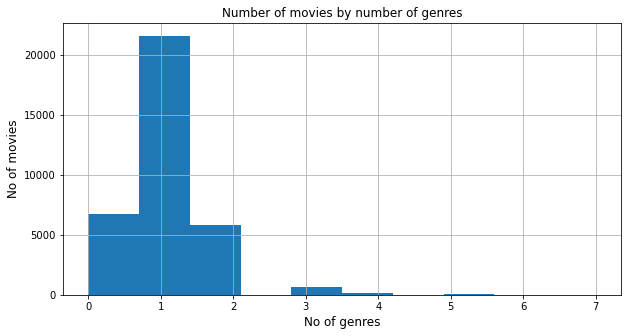

In [40]:
movies['MainGenresCount'].hist(figsize = (10,5))

plt.title("Number of movies by number of genres")
plt.ylabel('No of movies', fontsize=12)
plt.xlabel('No of genres', fontsize=12)
plt.show()

#### Classifier Training

- Count Vectorizer
- TF-IDF Vectorizers

In [41]:
txt = ["He is ::having a great Time, at the park time?",
       "She, unlike most women, is a big player on the park's grass.",
       "she can't be going"]

In [42]:
txt

['He is ::having a great Time, at the park time?',
 "She, unlike most women, is a big player on the park's grass.",
 "she can't be going"]

In [43]:
# Initializing a CountVectorizer object
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

In [44]:
# Transforming the data into a bag of words
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

# Printing the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['big', 'going', 'grass', 'great', 'having', 'park', 'player', 'time', 'unlike', 'women']

Every 3rd feature:
['big', 'great', 'player', 'women']


/Users/raghul/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
count_vec.fit_transform(txt).toarray()

array([[0, 0, 0, 1, 1, 1, 0, 2, 0, 0],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [46]:
count_vec.get_feature_names()[:4]

['big', 'going', 'grass', 'great']

In [47]:
z = movies.GenreSplitMain.str.split()
movies.GenreSplitMain[6:15].apply(lambda x: '-'.join(x)).str.split(pat='-',n=5,expand=True)

,0,1,2
6,action,None,None
7,comedy,None,None
8,,None,None
9,,None,None
10,short,None,None
11,action,crime,short
12,short,None,None
13,biography,None,None
14,comedy,None,None


In [48]:
movies.GenreSplitMain[6:15].apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')

,action,biography,comedy,crime,short
6,1,0,0,0,0
7,0,0,1,0,0
8,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,1
11,1,0,0,1,1
12,0,0,0,0,1
13,0,1,0,0,0
14,0,0,1,0,0


In [49]:
movies.GenreSplitMain[6:15]

6                   [action]
7                   [comedy]
8                         []
9                         []
10                   [short]
11    [action, crime, short]
12                   [short]
13               [biography]
14                  [comedy]
Name: GenreSplitMain, dtype: object

In [50]:
movies.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Count', 'GenreCorrected', 'GenreSplit',
       'GenreSplitMain', 'PlotClean', 'MainGenresCount'],
      dtype='object')

In [51]:
movies.shape

(34886, 14)

In [52]:
# Titles that are not unique
len(movies.Title.unique()) 

32432

In [53]:
# Movies without genre
movies[movies.GenreCorrected==''].shape

(6206, 14)

#### Classification Algorithm

 - Creating classes: One dummy variable for each genre
 - Split the data in train and test
 - TfidfVectorizer

In [54]:
# Creating a dummy class
movies = pd.concat([movies, movies.GenreSplitMain.apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')], axis=1)

In [55]:
# Creating a train_test_split
MoviesTrain, MoviesTest = train_test_split(movies[movies.GenreCorrected!=''], random_state=42, test_size=0.30, shuffle=True)

#### Feature Extraction

In [56]:
# definition the algorithm for feature extraction
tfidf = TfidfVectorizer(stop_words ='english', smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')

In [57]:
# Building the features ("Dimensionality mismatch")
x_train = tfidf.fit_transform(MoviesTrain.PlotClean) 
x_test  = tfidf.transform(MoviesTest.PlotClean)

In [58]:
print('nrow of the MoviesTrain ={}'. format(MoviesTrain.shape[0]))

nrow of the MoviesTrain =20076


In [59]:
print('nrow of the MoviesTest ={}'. format(MoviesTest.shape[0]))

nrow of the MoviesTest =8604


In [60]:
type(x_train)

scipy.sparse.csr.csr_matrix

In [61]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
tfidf.inverse_transform(x_train[0].toarray())

[array(['1930s', '1937', 'abilities', 'able', 'accept', 'accepts',
        'acquaintance', 'actively', 'adversely', 'affects', 'aggressive',
        'agrees', 'aide', 'allow', 'amidst', 'apartment', 'arena', 'army',
        'arouses', 'arrives', 'artist', 'artists', 'arts', 'attempts',
        'away', 'bag', 'bandit', 'bandits', 'barely', 'barrage', 'battle',
        'beaten', 'beating', 'beats', 'blows', 'bruce', 'brutal',
        'challenge', 'challenges', 'chance', 'chaos', 'cheered', 'child',
        'chinese', 'ching', 'chow', 'chuen', 'chun', 'claimed', 'closed',
        'coal', 'colleagues', 'collect', 'colonel', 'come', 'compete',
        'competitions', 'consents', 'conserve', 'contain', 'cotton',
        'crowd', 'days', 'declines', 'decrepit', 'defeat', 'defeats',
        'defends', 'defense', 'demands', 'desperate', 'despite', 'direct',
        'disciples', 'discussing', 'displays', 'does', 'door', 'earlier',
        'earn', 'effective', 'embarrassing', 'energy', 'enhanced'

In [63]:
print('The corpus is huge. It contain {} words.'.format(len(x_train[0].toarray()[0])))

The corpus is huge. It contain 103411 words.


In [64]:
# Building the classes
y_train = MoviesTrain[MoviesTrain.columns[14:]]
y_test = MoviesTest[MoviesTest.columns[14:]]

In [65]:
len(y_train.columns)

20

In [66]:
len(y_test.columns)

20

#### Multinomial Naive Bayes Classification

In [67]:
multinomialNB=OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))

In [68]:
# Model Fitting
multinomialNB.fit(x_train, y_train.action)

OneVsRestClassifier(estimator=MultinomialNB())

In [69]:
# Testing accuracy
prediction = multinomialNB.predict(x_test)

In [70]:
print('Test accuracy is {}'.format(accuracy_score(y_test.action, prediction)))

Test accuracy is 0.8265922826592282


In [71]:
len(mainGenres)

20

#### Multinomial Navie Bayes Classification for all the genre in the data

In [72]:
accuracy_multinomialNB=pd.DataFrame(columns=['Genre', 'accuracy_multinomialNB'])
accuracy_multinomialNB.head()

,Genre,accuracy_multinomialNB


In [73]:
i = 0
for genre in mainGenres:
    multinomialNB.fit(x_train, y_train[genre])
    prediction = multinomialNB.predict(x_test)
    accuracy_multinomialNB.loc[i,'Genre'] = genre
    accuracy_multinomialNB.loc[i,'accuracy_multinomialNB'] = accuracy_score(y_test[genre], prediction)
    i=i+1
    

    
accuracy_multinomialNB

,Genre,accuracy_multinomialNB
0,drama,0.673756
1,comedy,0.733147
2,action,0.826592
3,thriller,0.884589
4,romance,0.843096
5,crime,0.911088
6,musical,0.937587
7,animation,0.973849
8,children,0.957578
9,fantasy,0.974314


#### Linear Support Vector Classification for all the genres

In [74]:
linearSVC=OneVsRestClassifier(LinearSVC(), n_jobs=1)

In [75]:
accuracy_LinearSVC=pd.DataFrame(columns=['Genre', 'accuracy_LinearSVC'])
accuracy_LinearSVC.head()

,Genre,accuracy_LinearSVC


In [76]:
i = 0
for genre in mainGenres:
    linearSVC.fit(x_train, y_train[genre])
    prediction = linearSVC.predict(x_test)
    accuracy_LinearSVC.loc[i,'Genre'] = genre
    accuracy_LinearSVC.loc[i,'accuracy_LinearSVC'] = accuracy_score(y_test[genre], prediction)
    i=i+1

/Users/raghul/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raghul/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raghul/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raghul/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raghul/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/raghul/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.p

In [77]:
accuracy_LinearSVC

,Genre,accuracy_LinearSVC
0,drama,0.661669
1,comedy,0.746165
2,action,0.817178
3,thriller,0.884007
4,romance,0.882961
5,crime,0.924105
6,musical,0.956881
7,animation,0.977569
8,children,0.97013
9,fantasy,0.979777


In [78]:
# Merging both Multinomial Navie Bayes and Linear Support Vector accuracy tables
accuracy_svc_mnb = pd.merge(accuracy_multinomialNB, accuracy_LinearSVC, on='Genre', how='inner')

In [79]:
accuracy_svc_mnb

,Genre,accuracy_multinomialNB,accuracy_LinearSVC
0,drama,0.673756,0.661669
1,comedy,0.733147,0.746165
2,action,0.826592,0.817178
3,thriller,0.884589,0.884007
4,romance,0.843096,0.882961
5,crime,0.911088,0.924105
6,musical,0.937587,0.956881
7,animation,0.973849,0.977569
8,children,0.957578,0.97013
9,fantasy,0.974314,0.979777


 - It is observed that both the classification gives almost similar accuracy score in the above constructed table.

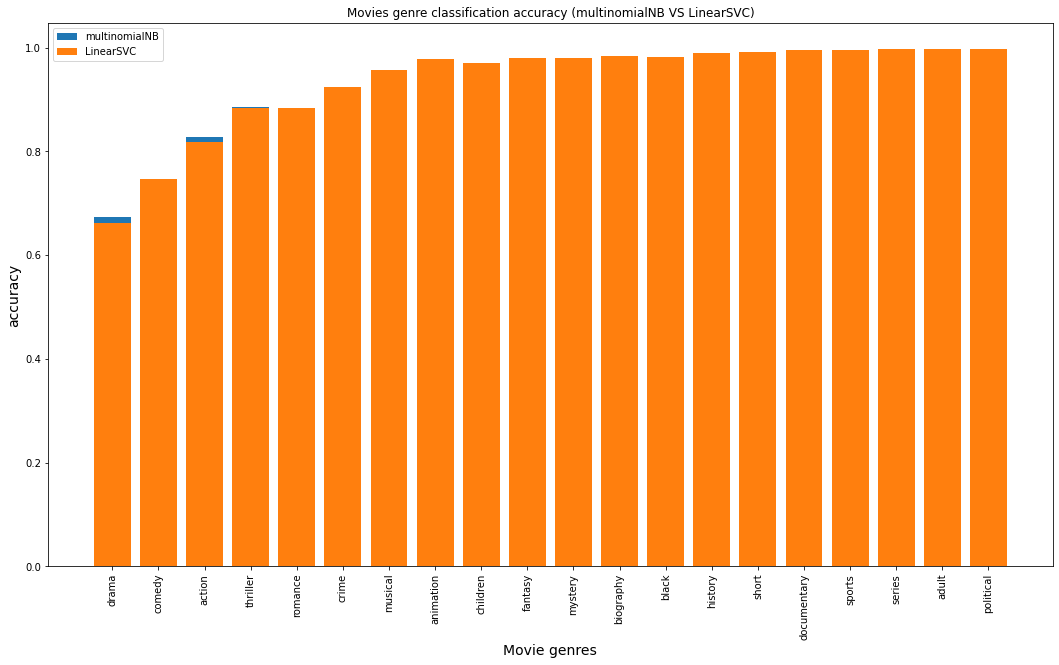

In [80]:
plt.figure(figsize=(18,10))
p1 =plt.bar(accuracy_svc_mnb.Genre, height=accuracy_svc_mnb.accuracy_multinomialNB)
p2 =plt.bar(accuracy_svc_mnb.Genre, height=accuracy_svc_mnb.accuracy_LinearSVC)
plt.xticks( rotation=90)
plt.title("Movies genre classification accuracy (multinomialNB VS LinearSVC)")
plt.ylabel('accuracy', fontsize=14)
plt.xlabel('Movie genres', fontsize=14)
plt.legend((p1[0], p2[0]), ('multinomialNB', 'LinearSVC'))
plt.show()

 - <B> Note:</B> This graph is not showing the comparision between the two classifiers, instead it shows just the depletion between certain values.

In [81]:
accuracy_multinomialNB1 = accuracy_multinomialNB
accuracy_multinomialNB1.columns = ['Genre', 'accuracy']
accuracy_multinomialNB1['classifier'] = 'multinomialNB'

In [82]:
accuracy_multinomialNB1

,Genre,accuracy,classifier
0,drama,0.673756,multinomialNB
1,comedy,0.733147,multinomialNB
2,action,0.826592,multinomialNB
3,thriller,0.884589,multinomialNB
4,romance,0.843096,multinomialNB
5,crime,0.911088,multinomialNB
6,musical,0.937587,multinomialNB
7,animation,0.973849,multinomialNB
8,children,0.957578,multinomialNB
9,fantasy,0.974314,multinomialNB


In [84]:
accuracy_LinearSVC1 = accuracy_LinearSVC
accuracy_LinearSVC1.columns = ['Genre', 'accuracy']
accuracy_LinearSVC1['classifier'] = 'linearSVC'

In [85]:
accuracy_LinearSVC1

,Genre,accuracy,classifier
0,drama,0.661669,linearSVC
1,comedy,0.746165,linearSVC
2,action,0.817178,linearSVC
3,thriller,0.884007,linearSVC
4,romance,0.882961,linearSVC
5,crime,0.924105,linearSVC
6,musical,0.956881,linearSVC
7,animation,0.977569,linearSVC
8,children,0.97013,linearSVC
9,fantasy,0.979777,linearSVC


In [86]:
accu_mnb_svc = accuracy_multinomialNB1.append(accuracy_LinearSVC1)

In [87]:
accu_mnb_svc

,Genre,accuracy,classifier
0,drama,0.673756,multinomialNB
1,comedy,0.733147,multinomialNB
2,action,0.826592,multinomialNB
3,thriller,0.884589,multinomialNB
4,romance,0.843096,multinomialNB
5,crime,0.911088,multinomialNB
6,musical,0.937587,multinomialNB
7,animation,0.973849,multinomialNB
8,children,0.957578,multinomialNB
9,fantasy,0.974314,multinomialNB


[Text(0, 0, 'drama'),
 Text(1, 0, 'comedy'),
 Text(2, 0, 'action'),
 Text(3, 0, 'thriller'),
 Text(4, 0, 'romance'),
 Text(5, 0, 'crime'),
 Text(6, 0, 'musical'),
 Text(7, 0, 'animation'),
 Text(8, 0, 'children'),
 Text(9, 0, 'fantasy'),
 Text(10, 0, 'mystery'),
 Text(11, 0, 'biography'),
 Text(12, 0, 'black'),
 Text(13, 0, 'history'),
 Text(14, 0, 'short'),
 Text(15, 0, 'documentary'),
 Text(16, 0, 'sports'),
 Text(17, 0, 'series'),
 Text(18, 0, 'adult'),
 Text(19, 0, 'political')]

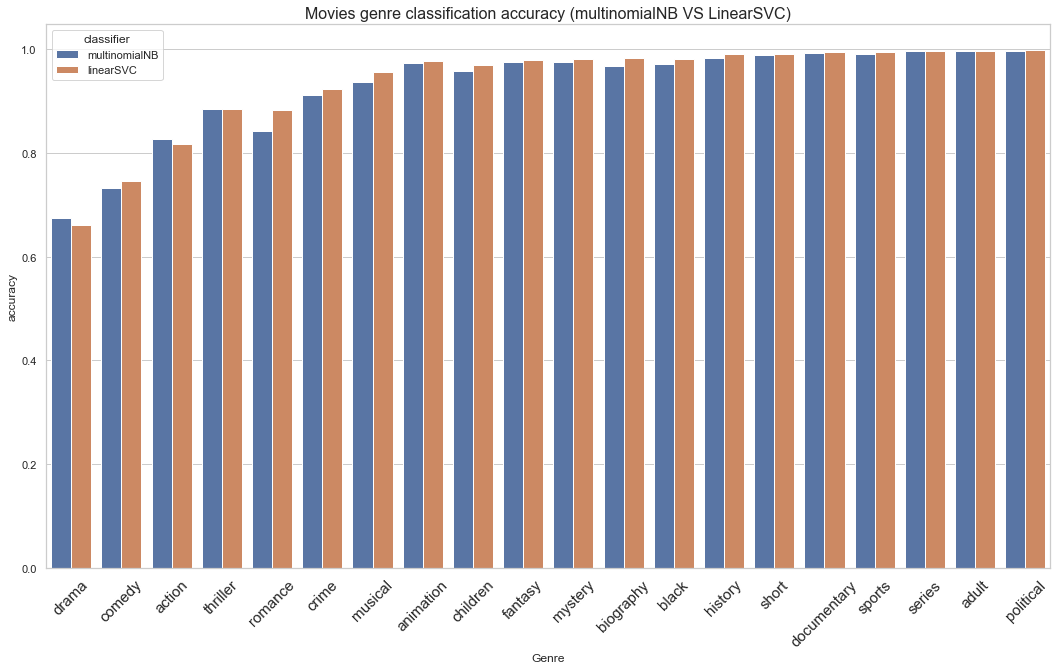

In [88]:
sns.set(rc={'figure.figsize':(18,10)})
sns.set(style="whitegrid")
s = sns.barplot(x="Genre", y="accuracy", hue="classifier", data=accu_mnb_svc) 
s.set_title('Movies genre classification accuracy (multinomialNB VS LinearSVC)', size=16)
s.set_xticklabels(list(mainGenres) ,rotation=45, size=15)

#### Conclusion

 - Multinomial Navie Bayes Algorithm and Linear Support Vector Classification showed very good accuracy rate.

     - Lowest Accuracy: 66%
     - Highest Accuracy: 99%
 


 - Also, Multinomial Navie Bayes Classification is faster that LinearSVC.
 - Multinomial Navie Bayes Classification does not have any convergence issues compared to LinearSVC.

-----------------------

#### Limitations
 - LinearSVC did not converge for some genres.
 - The reliability of the accuracy rate needs further investigation.